## Cell Model Passpor: images classification 

This notebook contains the exploratory analysis of snap taken for some lines of the Cell Model Passport (CMP)

### Libraries    

In [349]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

### Data path and parameter

In [231]:
PATH_img = "/Users/fz3/Documents/Sanger2.0/CMP_images/data/images_jpeg/"
PATH_test = "/Users/fz3/Documents/Sanger2.0/CMP_images/data/img_test/"
PATH_info = "/Users/fz3/Documents/Sanger2.0/CMP_images/data/model_list_20200204.csv"
PATH_cod = "/Users/fz3/Documents/Sanger2.0/CMP_images/data/MasterCellID_Lookup.csv"

# The loading of the dataset 

### Table describing all images

Import the raw table from CMP (cell line info) and images name to SIDM. 

In [129]:
lines_info = pd.read_csv(PATH_info, index_col='model_id')
lines_info = lines_info.rename_axis("SIDM")

cod_info = pd.read_csv(PATH_cod, index_col='SIDM')

In [144]:
lines_info.head()

,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,msi_status,mutational_burden,...,gender,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers
SIDM,,,,,,,,,,,,,,,,,,,,,
SIDM01098,SK-N-SH,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,MSS,4.766667,...,Female,Unknown,Unknown,SH-SY5Y is a thrice cloned (SK-N-SH -> SH-SY -...,717431,ACH-000149,SKNSH_AUTONOMIC_GANGLIA,CVCL_0531,NaN,ATCC:HTB-11
SIDM01222,MDA-MB-435S,NaN,Cell Line,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,Unknown,Unknown,MDA-MB-435 and its variant MDA-MB435S have bee...,NaN,ACH-000884,MDAMB435S_SKIN,CVCL_0622,NaN,ATCC:HTB-129
SIDM01476,COV434,NaN,Cell Line,Adherent,NaN,NaN,Unknown,NaN,NaN,NaN,...,Female,Unknown,Unknown,NaN,NaN,ACH-000123,COV434_OVARY,CVCL_2010,NaN,ECACC:07071909
SIDM00837,SW48,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,MSI,66.066667,...,Female,White,Unknown,NaN,909751,ACH-000958,SW48_LARGE_INTESTINE,CVCL_1724,NaN,ATCC:CCL-231
SIDM01254,P3HR-1,P3HRI;P3HR1-BL;P3J HR-1;P3J HR1-K,Cell Line,Suspension,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,Black,Unknown,P3HR-1 is a clonally derived subline of Jiyoye...,1330988,ACH-000707,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2676,NaN,ATCC:HTB-62


In [137]:
cod_info.head()

,Master Cell ID,Cell Line Name
SIDM,,
SIDM00837,1,SW48
SIDM00420,2,SW1710
SIDM00841,3,SW620
SIDM00933,4,CAL-51
SIDM01170,5,TOV-112D


Combining tables 

In [325]:
img_info = pd.merge(lines_info[['model_name','growth_properties','tissue','cancer_type']]
                    , cod_info[['Master Cell ID']]
                    , on="SIDM"
                    , how="right")


img_info['SIDM'] = img_info.index
img_info.index = img_info['Master Cell ID']

In [326]:
img_info

,model_name,growth_properties,tissue,cancer_type,Master Cell ID,SIDM
Master Cell ID,,,,,,
1165,SK-N-SH,Adherent,Peripheral Nervous System,Neuroblastoma,1165,SIDM01098
1,SW48,Adherent,Large Intestine,Colorectal Carcinoma,1,SIDM00837
1940,P3HR-1,Suspension,Haematopoietic and Lymphoid,Burkitt's Lymphoma,1940,SIDM01254
272,SW156,Adherent,Kidney,Kidney Carcinoma,272,SIDM01162
2108,NCI-H23,Adherent,Lung,Non-Small Cell Lung Carcinoma,2108,SIDM00138
...,...,...,...,...,...,...
424,NK-92MI,Suspension,Haematopoietic and Lymphoid,Other Blood Carcinomas,424,SIDM01201
1466,CHSA0011,Unknown,Bone,Chondrosarcoma,1466,SIDM00051
1941,JiyoyeP-2003,Suspension,Haematopoietic and Lymphoid,Burkitt's Lymphoma,1941,SIDM00808


### Dictionary, MasterCellID to tissue

In [225]:
master_to_tissue = dict(zip(img_info['Master Cell ID'], img_info['tissue']))

In [318]:
master_to_SIDM = dict(zip(img_info['Master Cell ID'], img_info['SIDM']))

In [327]:
master_to_type = dict(zip(img_info['Master Cell ID'], img_info['cancer_type']))

In [329]:
print(master_to_tissue[1786], master_to_SIDM[1786], master_to_type[1786])

Breast SIDM01056 Breast Carcinoma


### Loding images

#### Preprocessing
All the images are converted from .tif to .jpg to save space (aprox 1/35)

```
from PIL import Image
import glob

for name in glob.glob('*.tif'):
    im = Image.open(name)
    name = str(name).rstrip(".tif")
    im.save(name + '.jpg', 'JPEG')
```


### Importing one image, get pixel info and associate it to cell line and tissue

In [211]:
img = Image.open('data/images_jpeg/1149.jpg').convert('L')

#to visualise the image
#img.show()
#and get basic info 
print(img.format, img.size, img.mode)

None (2048, 1536) L


In [261]:
#image to arry of pixel intensty
im_arr = np.array(img)
print(im_arr.shape)

#array to flattened array
im_flat = im_arr.flatten()
print(im_flat.shape)

(1536, 2048)
(3145728,)


In [260]:
#array to flattened and normalised (0-1) array
norm = im_flat.astype('float32')/255.0

**Now loop on all images**

In [332]:
img_db = pd.DataFrame(columns=['im_id','SIDM','tissue','cancer_type'])

for filename in os.listdir(PATH_img):  
    if '.jpg' in filename:
    
        new_row = []

        im_id = filename.strip('.jpg')

        if ' (' in im_id:
            master = int(im_id.split(' ')[0])
        else:
            master = int(im_id.split('-')[0])  

        if master in master_to_SIDM.keys():
            SIDM = master_to_SIDM[master]
            tissue = master_to_tissue[master]
            cancer_type = master_to_type[master]
        else:
            SIDM = 'NA'
            tissue = 'NA'
            cancer_type = 'NA'
            
        new_row = pd.Series([im_id, SIDM, tissue, cancer_type],index=['im_id','SIDM','tissue','cancer_type'])
            

#         img = Image.open(PATH_test+filename).convert('L')
#         im_arr = np.array(img)
#         im_flat = im_arr.flatten()
#         im_norm = im_flat.astype('float32')/255.0
#         im_norm_series = pd.Series(im_norm, index=list(range(len(im_norm))))
        

#         new_row = pd.concat([new_row,im_norm_series])
        
        img_db = img_db.append(new_row, ignore_index=True)  
     
img_db


,im_id,SIDM,tissue,cancer_type
0,1877-8278,SIDM00423,Haematopoietic and Lymphoid,B-Cell Non-Hodgkin's Lymphoma
1,1476-8001,SIDM01081,Head and Neck,Oral Cavity Carcinoma
2,1068-8758,SIDM00043,Head and Neck,Head and Neck Carcinoma
3,2195-8403,SIDM00585,Liver,Hepatocellular Carcinoma
4,162,SIDM00540,Head and Neck,Oral Cavity Carcinoma
...,...,...,...,...
733,706-9149,SIDM00592,Head and Neck,Oral Cavity Carcinoma
734,153,SIDM01104,Skin,Melanoma
735,1875-8232,SIDM00654,Lung,Small Cell Lung Carcinoma
736,2138-8023,SIDM00278,Esophagus,Esophageal Squamous Cell Carcinoma


In [403]:
null_data = img_db[img_db.tissue=='NA']

In [404]:
null_data

,im_id,SIDM,tissue,cancer_type
475,522,NA,NA,NA
481,338-7838,NA,NA,NA


In [411]:
img_db.to_csv('images_info.csv', index=False )

In [374]:
tissue_df = pd.DataFrame.from_dict(dict(img_db.tissue.value_counts()),orient='index')

In [377]:
tissue_df.rename(columns = {0:'img_count'}, inplace = True)

In [378]:
tissue_df

,img_count
Lung,150
Haematopoietic and Lymphoid,122
Breast,57
Large Intestine,42
Skin,41
Ovary,40
Central Nervous System,37
Peripheral Nervous System,27
Bone,26
Head and Neck,24


Text(0.5, 1.0, 'Number of images per tissue type')

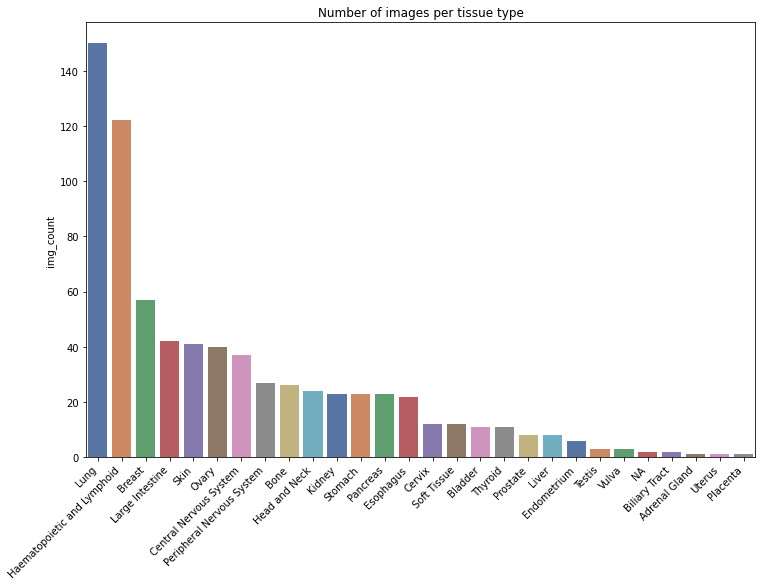

In [397]:
fig_dims = (12, 8)

fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.barplot(x = tissue_df.index, 
                    y = "img_count", 
                    ax=ax, 
                    data=tissue_df, 
                    palette="deep")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Number of images per tissue type')

### Alternative from the original dataframe using countplot

[Text(0, 0, 'Haematopoietic and Lymphoid'),
 Text(0, 0, 'Head and Neck'),
 Text(0, 0, 'Liver'),
 Text(0, 0, 'Thyroid'),
 Text(0, 0, 'Bone'),
 Text(0, 0, 'Breast'),
 Text(0, 0, 'Stomach'),
 Text(0, 0, 'Lung'),
 Text(0, 0, 'Ovary'),
 Text(0, 0, 'Prostate'),
 Text(0, 0, 'Large Intestine'),
 Text(0, 0, 'Central Nervous System'),
 Text(0, 0, 'Kidney'),
 Text(0, 0, 'Soft Tissue'),
 Text(0, 0, 'Skin'),
 Text(0, 0, 'Peripheral Nervous System'),
 Text(0, 0, 'Esophagus'),
 Text(0, 0, 'Cervix'),
 Text(0, 0, 'Biliary Tract'),
 Text(0, 0, 'Pancreas'),
 Text(0, 0, 'Bladder'),
 Text(0, 0, 'Endometrium'),
 Text(0, 0, 'Vulva'),
 Text(0, 0, 'Testis'),
 Text(0, 0, 'NA'),
 Text(0, 0, 'Adrenal Gland'),
 Text(0, 0, 'Uterus'),
 Text(0, 0, 'Placenta')]

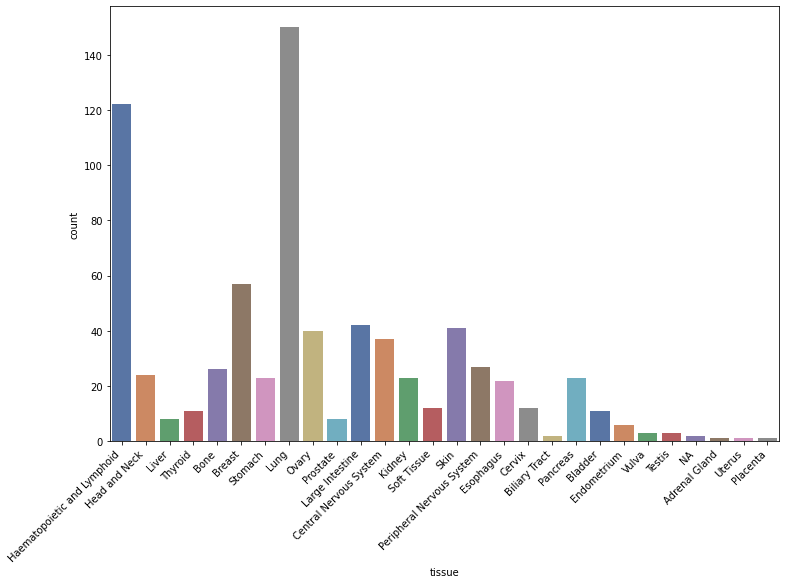

In [393]:
fig_dims = (12, 8)

fig, ax = plt.subplots(figsize=fig_dims)


chart = sns.countplot(x="tissue",
                      data=img_db,
                      palette="deep",
                      dodge=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')



### Let's look at cancer type

In [405]:
cancer_df = pd.DataFrame.from_dict(dict(img_db.cancer_type.value_counts()),orient='index')

In [406]:
cancer_df.rename(columns = {0:'img_count'}, inplace = True)

In [407]:
cancer_df

,img_count
Small Cell Lung Carcinoma,59
Non-Small Cell Lung Carcinoma,58
Breast Carcinoma,57
Colorectal Carcinoma,42
Melanoma,41
Ovarian Carcinoma,39
Other Solid Carcinomas,33
B-Cell Non-Hodgkin's Lymphoma,29
Neuroblastoma,27
Glioblastoma,24


Text(0.5, 1.0, 'Number of images per cancer type')

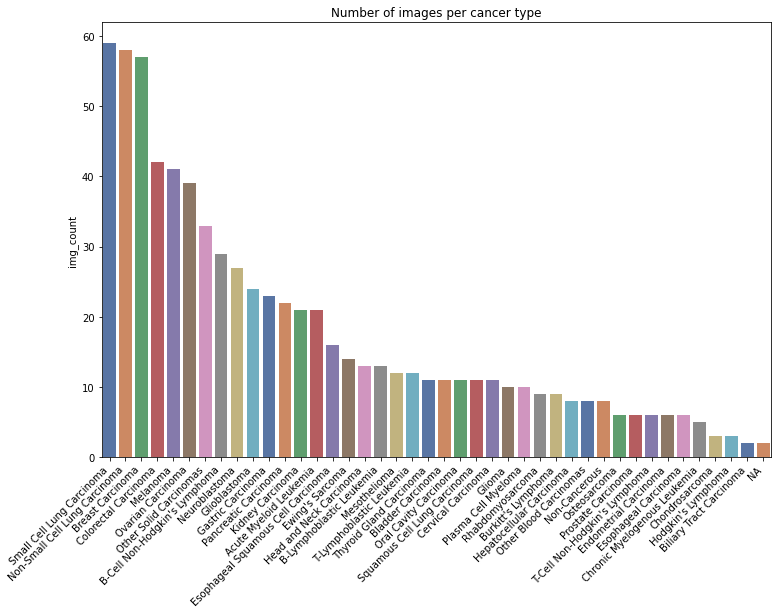

In [410]:
fig_dims = (12, 8)

fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.barplot(x = cancer_df.index, 
                    y = "img_count", 
                    ax=ax, 
                    data=cancer_df, 
                    palette="deep")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Number of images per cancer type')